# 11과 이변량분석 종합실습

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.숫자형 Y : car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 지역 주민 평균 교육수준(범주: 11~17)	|	feature	|



In [99]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [100]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

In [101]:
feature = 'Advertising'

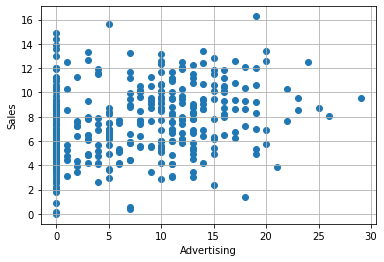

In [102]:
plt.scatter(data[feature], data[target])
plt.xlabel(feature)
plt.ylabel(target)
plt.grid()
plt.show()

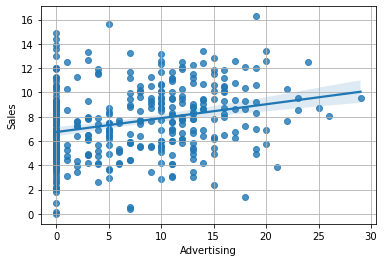

In [104]:
sns.regplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

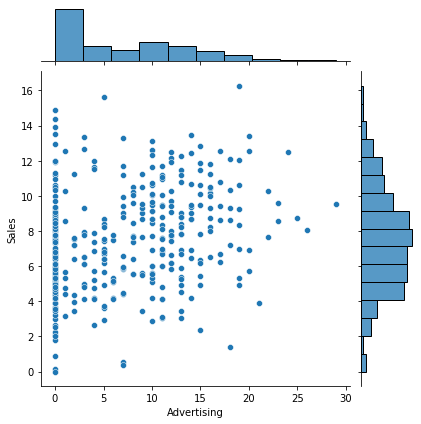

In [9]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

2) 수치화 : 상관분석

In [11]:
spst.pearsonr(data[feature], data[target])

(0.269506781376902, 4.377677110302732e-08)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 약한 상관관계를 가진다.
- 양의 상관관계가 있다. 그러나 강하지는 않다.

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

In [105]:
feature = 'Population'

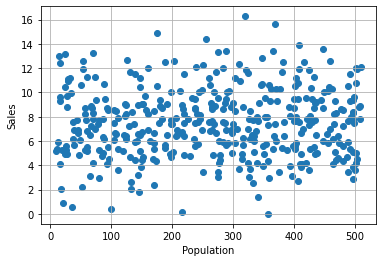

In [106]:
plt.scatter(data[feature], data[target])
plt.xlabel(feature)
plt.ylabel(target)
plt.grid()
plt.show()

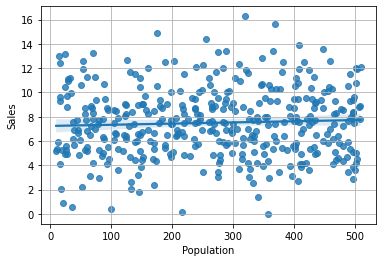

In [108]:
sns.regplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

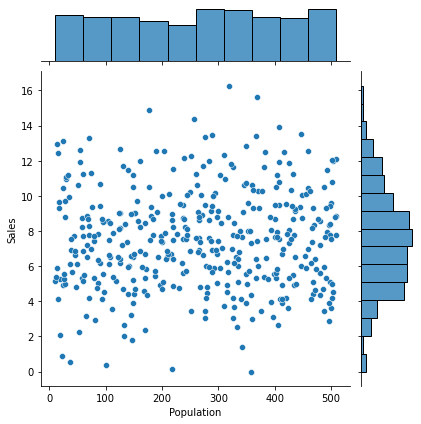

In [107]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

2) 수치화 : 상관분석

In [15]:
spst.pearsonr(data[feature], data[target])

(0.0504709844720392, 0.31398160931903)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관관계를 적다고 나오는데, p-value로 높아 직선의 관계는 없다.
- 인구수가 많으면 판매량이 늘어나는것 아닌가?

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

In [109]:
feature = 'Price'

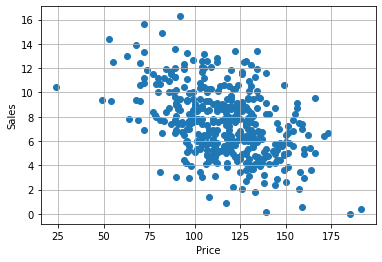

In [110]:
plt.scatter(data[feature], data[target])
plt.xlabel(feature)
plt.ylabel(target)
plt.grid()
plt.show()

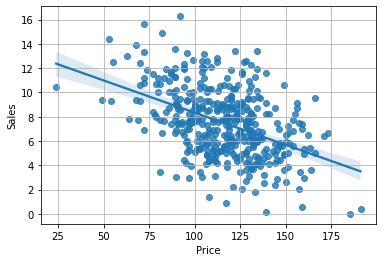

In [111]:
sns.regplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

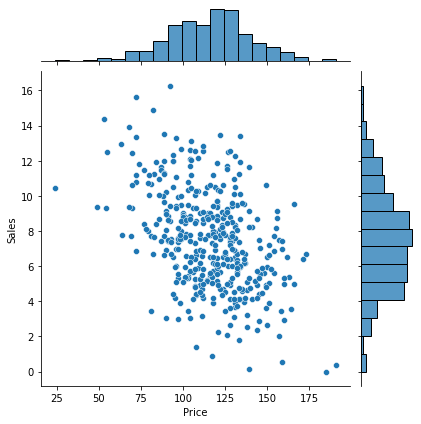

In [112]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

2) 수치화 : 상관분석

In [113]:
spst.pearsonr(data[feature], data[target])

(-0.4449507278465726, 7.61818701191294e-21)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관관계가 높다. p-value도 낮아서 믿을수있는 결과이다.
- 음의 상관 관계가 있다.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

In [114]:
feature = 'Age'

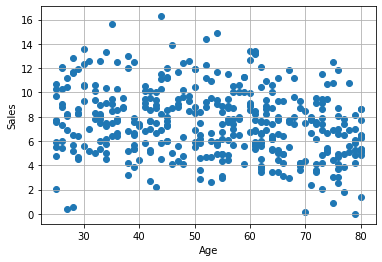

In [115]:
plt.scatter(data[feature], data[target])
plt.xlabel(feature)
plt.ylabel(target)
plt.grid()
plt.show()

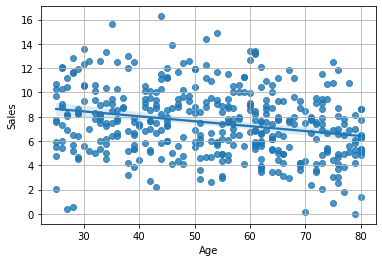

In [116]:
sns.regplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

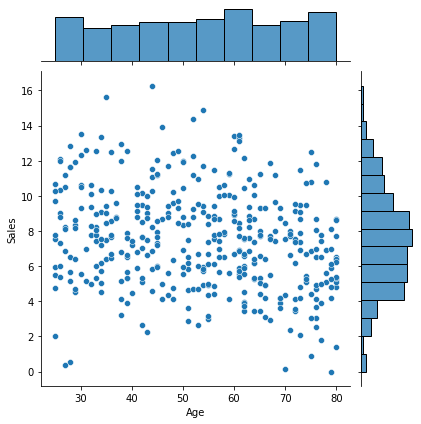

In [22]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

2) 수치화 : 상관분석

In [23]:
spst.pearsonr(data[feature], data[target])

(-0.2318154396045765, 2.7889498393711916e-06)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 약한 상관관계를 가지고 있다. p-value도 낮아서 믿을수 있다.
- 연령대(평균연령이 높아질수록 판매량이 낮아진다.) 그러나 강하지 않다.
- 카시트가 필요한 연령대가 있는것 아닌가?

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

In [24]:
feature = 'CompPrice'

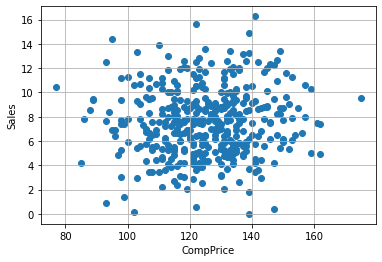

In [25]:
plt.scatter(data[feature], data[target])
plt.xlabel(feature)
plt.ylabel(target)
plt.grid()
plt.show()

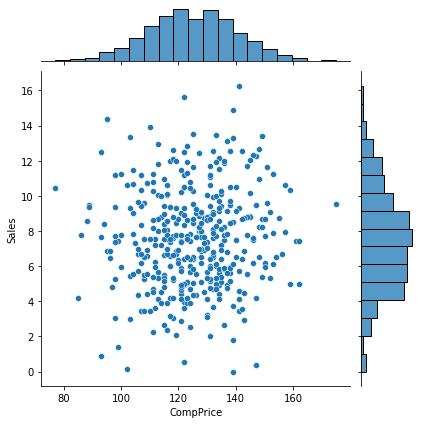

In [26]:
sns.jointplot(x=feature, y=target, data = data)
plt.show()

2) 수치화 : 상관분석

In [27]:
spst.pearsonr(data[feature], data[target])

(0.06407872955062152, 0.2009398289418295)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관관계는 없고 p=value도 높다.
- 데이터가 원형으로 모여있는 느낌이 든다.
- 경쟁사 가격, 판매량 관련 없다. 왜 그럴까?

- 가격경쟁력 변수 추가~!!!

In [118]:
data['Price_diff'] = data['CompPrice'] - data['Price']

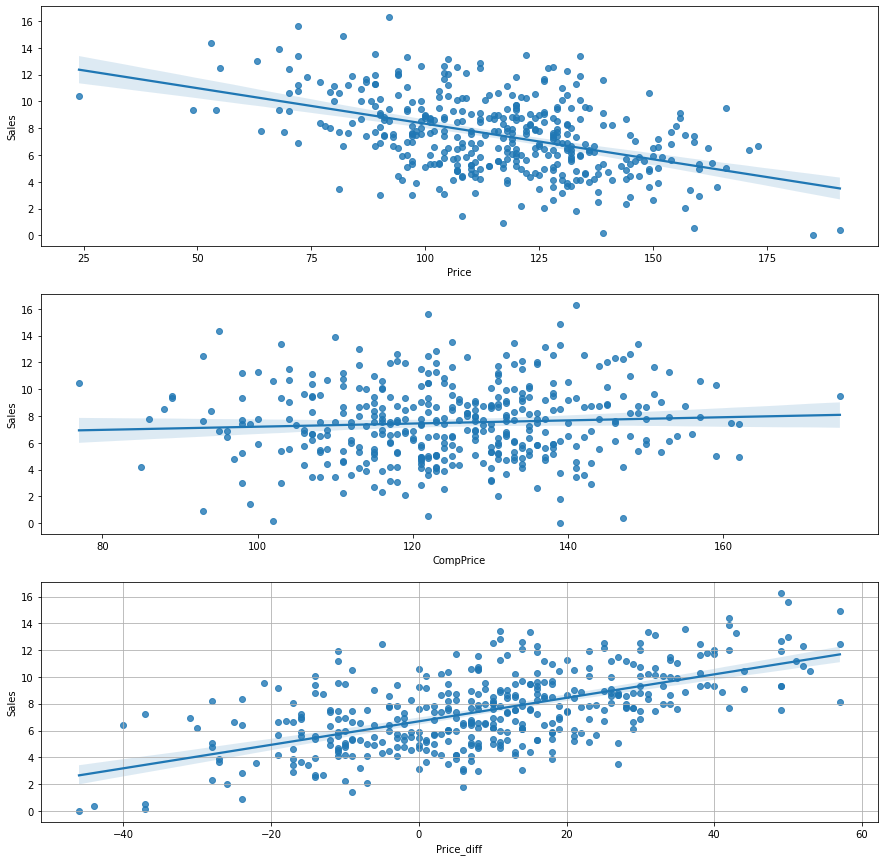

In [123]:
plt.figure(figsize = (15, 15))
plt.subplot(3, 1, 1)
sns.regplot(x='Price', y=target, data=data)
plt.subplot(3, 1, 2)
sns.regplot(x='CompPrice', y=target, data=data)
plt.subplot(3, 1, 3)
sns.regplot(x='Price_diff', y=target, data=data)
plt.grid()
plt.show()

In [124]:
spst.pearsonr(data['Price'], data[target])

(-0.4449507278465726, 7.61818701191294e-21)

In [125]:
spst.pearsonr(data['CompPrice'], data[target])

(0.06407872955062152, 0.2009398289418295)

In [126]:
spst.pearsonr(data['Price_diff'], data[target])

(0.5979217124533921, 3.877120641788835e-40)

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

In [31]:
feature = 'ShelveLoc'

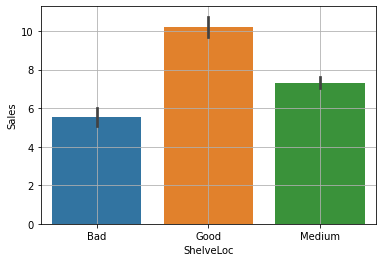

In [33]:
sns.barplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [ ]:
# 범주가 3개라서 anova를 사용

In [37]:
data[feature].isna().sum()

0

In [38]:
data[feature].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [42]:
s_Bad = data.loc[data[feature] == 'Bad', target]
s_Good = data.loc[data[feature] == 'Good', target]
s_Medium = data.loc[data[feature] == 'Medium', target]

In [43]:
spst.f_oneway(s_Bad, s_Good, s_Mediums)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
각 범주별로 tartget 차이가 있다.

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

In [44]:
feature = 'US'

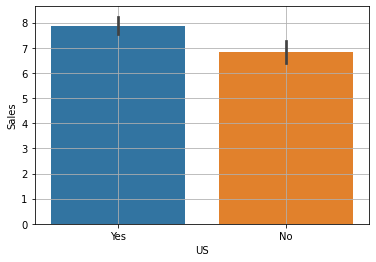

In [45]:
sns.barplot(x=feature, y=target, data=data)
plt.grid()
plt.show()

2) 수치화 : t-test, anova

In [ ]:
# 2개 t-test

In [46]:
data[feature].isna().sum()

0

In [47]:
data[feature].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
d

In [48]:
us_Yes = data.loc[data[feature] == 'Yes', target]
us_No = data.loc[data[feature] == 'No', target]

In [49]:
spst.ttest_ind(us_Yes, us_No)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

차이가 크진 않지만 차이가 있다고 본다.

### (3) 관계 정리하기

① 강한관계

In [ ]:
Price, ShelveLoc, price_diff

② 중간관계

In [ ]:
Advertising, Age, US

③ 관계없음

In [ ]:
Population, CompPrice

# 2.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [50]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
data = pd.read_csv('https://bit.ly/3PArw4W')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [128]:
spst.pearsonr(data['tax'], data['medv'])

(-0.4685359335677671, 5.637733627689083e-29)

In [51]:
target = 'Survived'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

In [53]:
feature = "Age"

1) 그래프 : histogram, densityplot

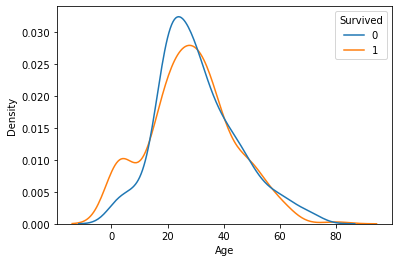

In [54]:
sns.kdeplot(x=feature, data = titanic, hue = target, common_norm = False) #nomalize
plt.show() 

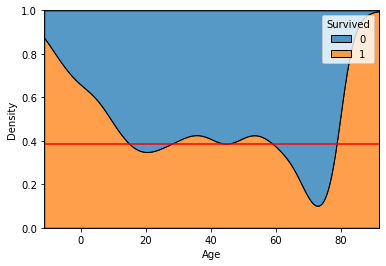

In [55]:
sns.kdeplot(x=feature, data = titanic, hue =target
            , multiple = 'fill')
plt.axhline(titanic[target].mean(), color = 'r')
plt.show()

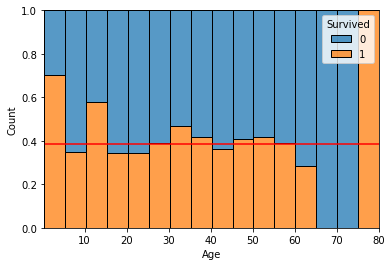

In [56]:
sns.histplot(x=feature, data = titanic, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(titanic[target].mean(), color = 'r')
plt.show()

2) 수치화 : 로지스틱회귀

In [58]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
temp = titanic.loc[titanic[feature].notnull(), ]

In [63]:
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


3) 관계 평가하기

In [ ]:
어느 정도는 관계가 있다.

4) 추가 분석할 내용 정리

In [ ]:
값이 차이가나는 -과 20 부분 근처 data를 분석해본다.

#### ② Fare --> Survived

In [64]:
feature = "Fare"

1) 그래프 : histogram, densityplot

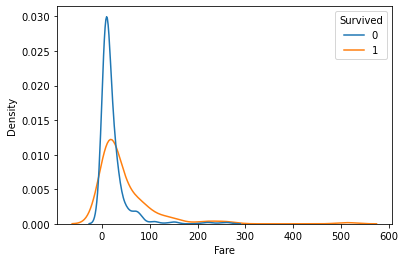

In [65]:
sns.kdeplot(x=feature, data = titanic, hue = target, common_norm = False) #nomalize
plt.show() 

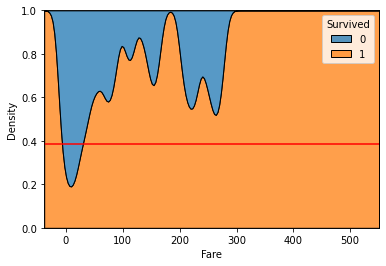

In [66]:
sns.kdeplot(x=feature, data = titanic, hue =target
            , multiple = 'fill')
plt.axhline(titanic[target].mean(), color = 'r')
plt.show()

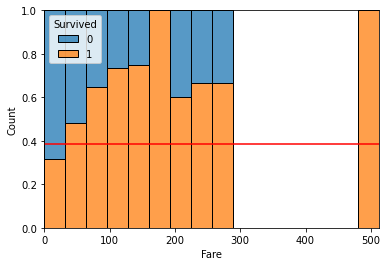

In [67]:
sns.histplot(x=feature, data = titanic, bins = 16
             , hue =target, multiple = 'fill')
plt.axhline(titanic[target].mean(), color = 'r')
plt.show()

2) 수치화 : 로지스틱회귀

In [68]:
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.685885
         Iterations 4
Fare    0.002606
dtype: float64


3) 관계 평가하기

In [ ]:
관계가 있다.

4) 추가 분석할 내용 정리

In [ ]:
생존률 차이가 나는 0~50 데이터 분석필요

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

In [69]:
feature = 'Sex'

1) 교차표(pd.crosstab())

In [73]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [74]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [75]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'all')

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


2) 시각화( Stacked Bar, Mosaic)

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


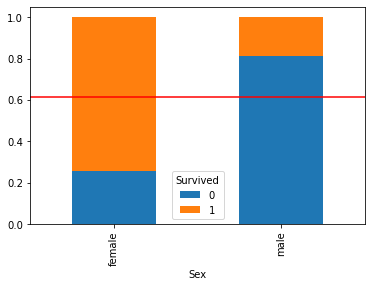

In [76]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)

# 전체 평균
plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

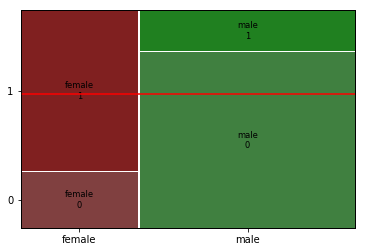

In [77]:
mosaic(titanic.sort_values([feature,target]), [ feature,'Survived'])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [78]:
# 먼저 집계
table = pd.crosstab(titanic[target], titanic[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Sex       female  male
Survived              
0             81   468
1            233   109
----------------------------------------------------------------------------------------------------
카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
자유도 1
기대빈도
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


4) 관계 평가하기

In [ ]:
관계가 크다.

5) 추가 분석하기

#### ② Pclass --> Survived

In [82]:
feature = 'Pclass'

1) 교차표(pd.crosstab())

In [90]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [89]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'index')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


In [88]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'all')

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


2) 시각화( Stacked Bar, Mosaic)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


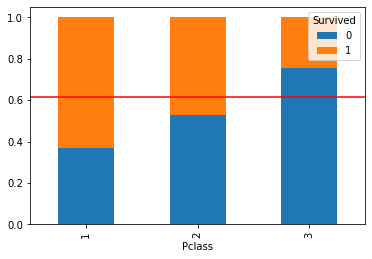

In [86]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)

# 전체 평균
plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

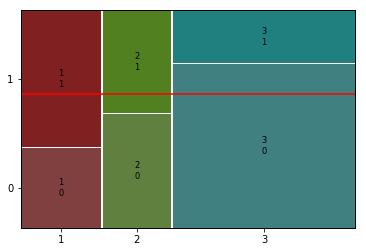

In [87]:
mosaic(titanic.sort_values([feature,target]), [ feature,'Survived'])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [91]:
# 먼저 집계
table = pd.crosstab(titanic[target], titanic[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
자유도 2
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


4) 관계 평가하기

In [ ]:
강한 관계이다.

5) 추가 분석하기

#### ③ Embarked --> Survived

In [ ]:
feature = 'Embarked '

1) 교차표(pd.crosstab())

In [92]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [93]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'index')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


In [94]:
pd.crosstab(titanic[target], titanic[feature], normalize = 'all')

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


2) 시각화( Stacked Bar, Mosaic)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


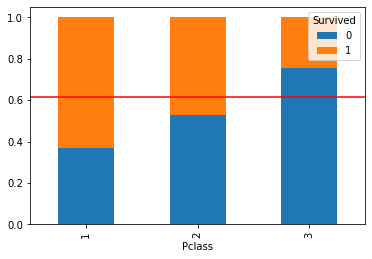

In [95]:
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)

# 전체 평균
plt.axhline(1-titanic[target].mean(), color = 'r')
plt.show()

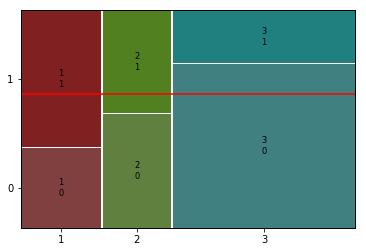

In [96]:
mosaic(titanic.sort_values([feature,target]), [ feature,'Survived'])
plt.axhline(1- titanic[target].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [97]:
# 먼저 집계
table = pd.crosstab(titanic[target], titanic[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
자유도 2
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


4) 관계 평가하기

In [ ]:
강한 관계이다.

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

In [ ]:
Age, Sex, Pclass, Embarked

② 중간관계

In [ ]:
Fare

③ 관계없음